In [120]:
#Importing General Library
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

#Sklearn Library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Keras Library
from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



#NLTK Library
import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omarm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omarm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omarm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omarm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omarm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omarm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



# 3) ANALYSIS

3.1 Reading the Data

In [29]:
df0 = pd.read_excel("Output Womens Clothing E-Commerce Reviews.xlsx")
df = df0.copy()
df.head()

,Unnamed: 0,Clothing ID,Review_Text,Rating,Recommended_IND,Category_name,Sentiment,Size,Material,Longevity,Color,General,Comfort
0,96,861,i am in need of easy comfortable tops for ever...,3,0,Knits,Neutral,POS,POS,NaN,POS,NaN,POS
1,123,1133,i read the previous reviews and had hoped that...,4,1,Jackets,Positive,POS,POS,NaN,POS,NaN,POS
2,240,872,this is exactly what i was expecting cute comf...,5,1,Knits,Positive,NaN,POS,NaN,POS,NaN,POS
3,276,1104,this dress is gorgeous i love it i bought it t...,5,1,Dresses,Positive,NaN,POS,NaN,POS,NaN,POS
4,310,836,love this top made with 100 cotton a vintage l...,5,1,Tops,Positive,POS,NaN,NaN,POS,NaN,POS


# 4) EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION

4.1 - A General Looking at the Data<p>

In [30]:
df.head()

,Unnamed: 0,Clothing ID,Review_Text,Rating,Recommended_IND,Category_name,Sentiment,Size,Material,Longevity,Color,General,Comfort
0,96,861,i am in need of easy comfortable tops for ever...,3,0,Knits,Neutral,POS,POS,NaN,POS,NaN,POS
1,123,1133,i read the previous reviews and had hoped that...,4,1,Jackets,Positive,POS,POS,NaN,POS,NaN,POS
2,240,872,this is exactly what i was expecting cute comf...,5,1,Knits,Positive,NaN,POS,NaN,POS,NaN,POS
3,276,1104,this dress is gorgeous i love it i bought it t...,5,1,Dresses,Positive,NaN,POS,NaN,POS,NaN,POS
4,310,836,love this top made with 100 cotton a vintage l...,5,1,Tops,Positive,POS,NaN,NaN,POS,NaN,POS


In [31]:
#df.drop("Unnamed:0", axis=1, inplace=True)
df.head(1)

,Unnamed: 0,Clothing ID,Review_Text,Rating,Recommended_IND,Category_name,Sentiment,Size,Material,Longevity,Color,General,Comfort
0,96,861,i am in need of easy comfortable tops for ever...,3,0,Knits,Neutral,POS,POS,NaN,POS,NaN,POS


In [32]:
# to find how many unique values numerical features have

#for col in df.select_dtypes(include=[np.number]).columns:
  #print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

In [33]:
# to find how many unique values object features have

#for col in df.select_dtypes(include="object").columns:
  #print(colored(f"{col}", 'green', attrs=['bold']), f"feature has", colored(f"{df[col].nunique()}", 'green', attrs=['bold']), f"unique values.")

# 5) FEATURE SELECTION & DATA CLEANING

5.1 Feature Selection

In [34]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Review_Text', 'Rating', 'Recommended_IND',
       'Category_name', 'Sentiment', 'Size', 'Material', 'Longevity', 'Color',
       'General', 'Comfort'],
      dtype='object')

In [35]:
df.drop(['Unnamed: 0', 'Clothing ID', 'Rating', 'Recommended_IND',
       'Category_name', 'Size', 'Material', 'Longevity', 'Color',
       'General', 'Comfort'], axis=1, inplace=True)

In [36]:
df.head(3)

,Review_Text,Sentiment
0,i am in need of easy comfortable tops for ever...,Neutral
1,i read the previous reviews and had hoped that...,Positive
2,this is exactly what i was expecting cute comf...,Positive


5.2 Detecting & Handling With Missing Values

In [37]:
df['Review_Text'].isnull().value_counts()

False    22641
True       826
Name: Review_Text, dtype: int64

In [38]:
df['Sentiment'].isnull().value_counts()

False    23467
Name: Sentiment, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23467 entries, 0 to 23466
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  22641 non-null  object
 1   Sentiment    23467 non-null  object
dtypes: object(2)
memory usage: 366.8+ KB


In [40]:
df = df.dropna()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23466
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  22641 non-null  object
 1   Sentiment    22641 non-null  object
dtypes: object(2)
memory usage: 530.6+ KB


In [42]:
df['Review_Text'].isnull().value_counts()

False    22641
Name: Review_Text, dtype: int64

In [43]:
df['Sentiment'].isnull().value_counts()

False    22641
Name: Sentiment, dtype: int64

In [44]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

In [45]:
missing_values(df)

,Missing_Number,Missing_Percent


In [46]:
blanks = []  # start with an empty list

for rv in df.itertuples(): # iterate over the DataFrame
    if type(rv)==str and rv.isspace(): # avoid NaN values and test 'review' for whitespace
        blanks.append(i)
blanks

[]

In [47]:
df.head()

,Review_Text,Sentiment
0,i am in need of easy comfortable tops for ever...,Neutral
1,i read the previous reviews and had hoped that...,Positive
2,this is exactly what i was expecting cute comf...,Positive
3,this dress is gorgeous i love it i bought it t...,Positive
4,love this top made with 100 cotton a vintage l...,Positive


In [48]:
df["Review_Text"].str.isspace().sum()

0

In [49]:
df[df["Review_Text"].str.isspace() == True].index

Int64Index([], dtype='int64')

# 6) TEXT MINING

6.1 Tokenization, Noise Removal & Lexicon Normalization

In [50]:
def cleaning_fsa(data):
    
    import re
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]','', data)
         
    #2. Tokenize
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [51]:
stop_words = stopwords.words('english')

In [52]:
text = cleaning_fsa(str(df["Review_Text"]))
text

'need easy comfortable top ever read previous review hoped exactly expecting cute comf dress gorgeous love bought love top made cotton vintage l happy snag dress reminds maternity clothes soft stretc fit well top see bought dress wedding dress lovely platinum feminine name length dtype object'

In [53]:
df["Review_Text"] = df["Review_Text"].apply(cleaning_fsa)
df["Review_Text"].head()

0    need easy comfortable top everyday wear bought...
1    read previous review hoped exclamation color i...
2    exactly expecting cute comfortable casual gold...
3    dress gorgeous love bought wear july wedding g...
4    love top made cotton vintage look flattering d...
Name: Review_Text, dtype: object

In [54]:
df.head(3)

,Review_Text,Sentiment
0,need easy comfortable top everyday wear bought...,Neutral
1,read previous review hoped exclamation color i...,Positive
2,exactly expecting cute comfortable casual gold...,Positive


6.2 Handling With Rare Words<p>

In [55]:
" ".join(df["Review_Text"]).split()

['need',
 'easy',
 'comfortable',
 'top',
 'everyday',
 'wear',
 'bought',
 'top',
 'mostly',
 'cute',
 'button',
 'received',
 'looked',
 'exactly',
 'picture',
 'online',
 'however',
 'button',
 'kept',
 'slipping',
 'home',
 'hole',
 'slightly',
 'big',
 'shirt',
 'fit',
 'tad',
 'snug',
 'near',
 'upper',
 'arm',
 'would',
 'stretch',
 'loosen',
 'throughout',
 'day',
 'definitely',
 'comfortable',
 'shirt',
 'felt',
 'like',
 'pajama',
 'top',
 'going',
 'back',
 'read',
 'previous',
 'review',
 'hoped',
 'exclamation',
 'color',
 'inaccurate',
 'exaggerated',
 'however',
 'sadly',
 'true',
 'let',
 'clear',
 'beautiful',
 'comfortable',
 'piece',
 'clothing',
 'put',
 'feel',
 'thick',
 'good',
 'quality',
 'pattern',
 'interesting',
 'pretty',
 'dark',
 'orange',
 'color',
 'expecting',
 'actually',
 'mud',
 'brown',
 'think',
 'unfortunate',
 'retailer',
 'misrepresented',
 'key',
 'element',
 'jacket',
 'digress',
 'exactly',
 'expecting',
 'cute',
 'comfortable',
 'casual',
 

In [56]:
word_values = pd.Series(" ".join(df["Review_Text"]).split()).value_counts()
word_values

dress         11439
fit           10182
size           9440
love           9004
top            8370
              ...  
homespun          1
proofed           1
integrated        1
titled            1
platinum          1
Length: 12115, dtype: int64

In [57]:
rare_words = word_values[word_values <= 2]
rare_words

recomme       2
bonnet        2
faced         2
filipino      2
swooned       2
             ..
homespun      1
proofed       1
integrated    1
titled        1
platinum      1
Length: 6569, dtype: int64

In [58]:
rare_words.value_counts()

1    5105
2    1464
dtype: int64

In [59]:
len(rare_words)

6569

In [60]:
rare_words.index

Index(['recomme', 'bonnet', 'faced', 'filipino', 'swooned', 'spetite', 'dones',
       'sneak', 'sandpaper', 'mat',
       ...
       'mon', 'gulped', 'compaint', 'ldecide', 'vulnerable', 'homespun',
       'proofed', 'integrated', 'titled', 'platinum'],
      dtype='object', length=6569)

In [61]:
df["Review_Text"] = df["Review_Text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df["Review_Text"].head()

0    need easy comfortable top everyday wear bought...
1    read previous review hoped color exaggerated h...
2    exactly expecting cute comfortable casual gold...
3    dress gorgeous love bought wear july wedding g...
4    love top made cotton vintage look flattering d...
Name: Review_Text, dtype: object

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23466
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  22641 non-null  object
 1   Sentiment    22641 non-null  object
dtypes: object(2)
memory usage: 530.6+ KB


In [63]:
df.head(3)

,Review_Text,Sentiment
0,need easy comfortable top everyday wear bought...,Neutral
1,read previous review hoped color exaggerated h...,Positive
2,exactly expecting cute comfortable casual gold...,Positive



# 7) WORLDCLOUD - REPETITION OF WORDS

7.1 The Detection of Positive and Negative Reviews

In [64]:
df.columns

Index(['Review_Text', 'Sentiment'], dtype='object')

In [65]:
df[df["Sentiment"] == 0]

,Review_Text,Sentiment


In [66]:
df[df["Sentiment"] == 1]

,Review_Text,Sentiment


In [67]:
df["Sentiment"].value_counts()

Positive    17448
Neutral      2823
Negative     2370
Name: Sentiment, dtype: int64

7.2 The Collection of Positive and Negative Words

In [68]:
" ".join(df["Review_Text"]).split()

['need',
 'easy',
 'comfortable',
 'top',
 'everyday',
 'wear',
 'bought',
 'top',
 'mostly',
 'cute',
 'button',
 'received',
 'looked',
 'exactly',
 'picture',
 'online',
 'however',
 'button',
 'kept',
 'slipping',
 'home',
 'hole',
 'slightly',
 'big',
 'shirt',
 'fit',
 'tad',
 'snug',
 'near',
 'upper',
 'arm',
 'would',
 'stretch',
 'loosen',
 'throughout',
 'day',
 'definitely',
 'comfortable',
 'shirt',
 'felt',
 'like',
 'pajama',
 'top',
 'going',
 'back',
 'read',
 'previous',
 'review',
 'hoped',
 'color',
 'exaggerated',
 'however',
 'sadly',
 'true',
 'let',
 'clear',
 'beautiful',
 'comfortable',
 'piece',
 'clothing',
 'put',
 'feel',
 'thick',
 'good',
 'quality',
 'pattern',
 'interesting',
 'pretty',
 'dark',
 'orange',
 'color',
 'expecting',
 'actually',
 'brown',
 'think',
 'unfortunate',
 'retailer',
 'key',
 'element',
 'jacket',
 'exactly',
 'expecting',
 'cute',
 'comfortable',
 'casual',
 'gold',
 'sequin',
 'scroll',
 'work',
 'see',
 'online',
 'super',
 '

In [69]:
neg_words = " ".join(df[df["Sentiment"] == 0].Review_Text).split()
neg_words 

[]

In [70]:
pos_words =" ".join(df[df["Sentiment"] == 1].Review_Text).split()
pos_words

[]

# 8) SENTIMENT CLASSIFICATION WITH MACHINE LEARNING & DEEP LEARNING


- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model.

8.1 Train | Test & Split

**To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.**

**Let's first we split the data into train and test sets:**

In [71]:
df.head()

,Review_Text,Sentiment
0,need easy comfortable top everyday wear bought...,Neutral
1,read previous review hoped color exaggerated h...,Positive
2,exactly expecting cute comfortable casual gold...,Positive
3,dress gorgeous love bought wear july wedding g...,Positive
4,love top made cotton vintage look flattering d...,Positive


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = df["Review_Text"]
y= df["Sentiment"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

8.2 Vectorization

8.2.a Count Vectorization

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [77]:
type(X_train_count)

scipy.sparse._csr.csr_matrix

In [78]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [79]:
vectorizer.get_feature_names()

['aa',
 'ab',
 'abby',
 'abdomen',
 'ability',
 'able',
 'abo',
 'absolute',
 'absolutely',
 'absolutley',
 'abstract',
 'absurd',
 'abt',
 'abundance',
 'ac',
 'accent',
 'accented',
 'accentuate',
 'accentuated',
 'accentuates',
 'accentuating',
 'accept',
 'acceptable',
 'access',
 'accessorize',
 'accessorized',
 'accessorizing',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'accommodate',
 'accommodates',
 'accommodating',
 'accomodate',
 'according',
 'accordingly',
 'account',
 'accurate',
 'accurately',
 'achieve',
 'across',
 'acrylic',
 'act',
 'action',
 'active',
 'activewear',
 'activity',
 'actual',
 'actuality',
 'actually',
 'ad',
 'ada',
 'add',
 'added',
 'addicted',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'adequate',
 'adequately',
 'adjust',
 'adjustable',
 'adjusted',
 'adjusting',
 'adjustment',
 'admire',
 'admired',
 'admiring',
 'admit',
 'admittedly',
 'adn',
 'ador',
 'adorable',
 'adore',
 'adored',
 'adult',
 'adva

In [80]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


8.2.b TF-IDF Vectorization

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [83]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [86]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    fig, ax = plt.subplots(figsize=(8, 8))
    
    plot_confusion_matrix(model, X_test, y_test, ax=ax)

# 9) MACHINE & DEEP LEARNING MODELLING

9.1 Logistic Regression

9.1.a Logistic Regression With Count Vectorizor

In [87]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

    Negative       0.46      0.56      0.50       474
     Neutral       0.34      0.48      0.40       565
    Positive       0.94      0.85      0.89      3490

    accuracy                           0.77      4529
   macro avg       0.58      0.63      0.60      4529
weighted avg       0.82      0.77      0.79      4529

Train_Set
              precision    recall  f1-score   support

    Negative       0.76      0.94      0.84      1896
     Neutral       0.64      0.89      0.75      2258
    Positive       0.99      0.90      0.94     13958

    accuracy                           0.90     18112
   macro avg       0.80      0.91      0.84     18112
weighted avg       0.92      0.90      0.91     18112



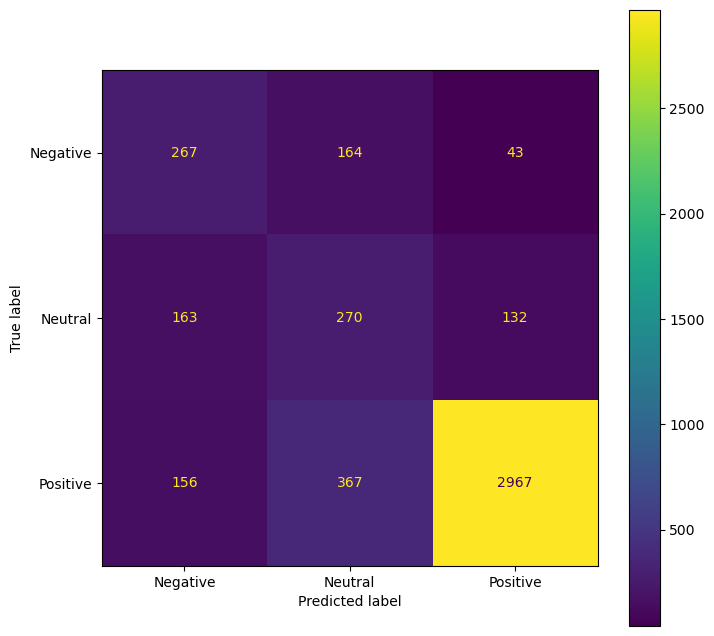

In [88]:
print("LOG MODEL")

eval(log, X_train_count, X_test_count)

In [89]:
pip install -U yellowbrick

Note: you may need to restart the kernel to use updated packages.


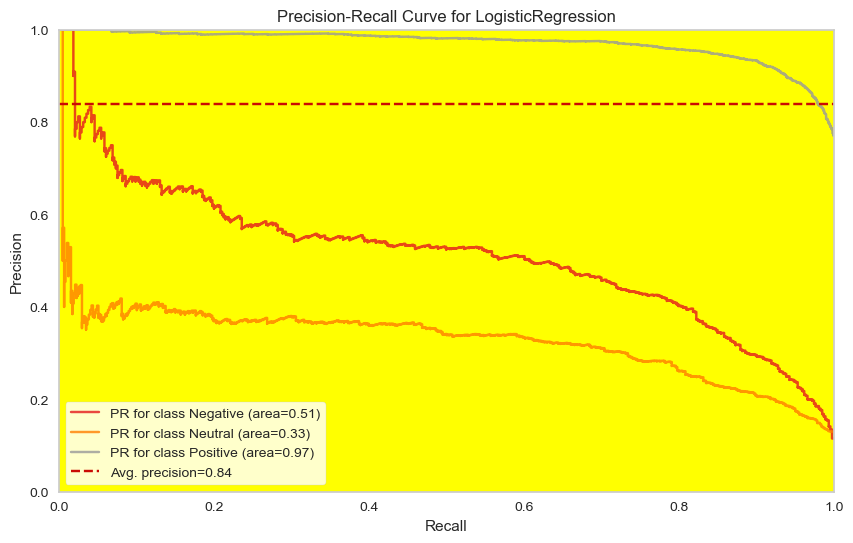

In [90]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
                            LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [91]:
log_AP_count = viz.score_

9.1.b Logistic Regression With TF-IDF Vectorizer

In [92]:
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

    Negative       0.46      0.63      0.53       474
     Neutral       0.33      0.48      0.39       565
    Positive       0.95      0.83      0.89      3490

    accuracy                           0.77      4529
   macro avg       0.58      0.65      0.60      4529
weighted avg       0.82      0.77      0.79      4529

Train_Set
              precision    recall  f1-score   support

    Negative       0.55      0.76      0.64      1896
     Neutral       0.40      0.62      0.49      2258
    Positive       0.97      0.83      0.89     13958

    accuracy                           0.80     18112
   macro avg       0.64      0.74      0.67     18112
weighted avg       0.85      0.80      0.82     18112



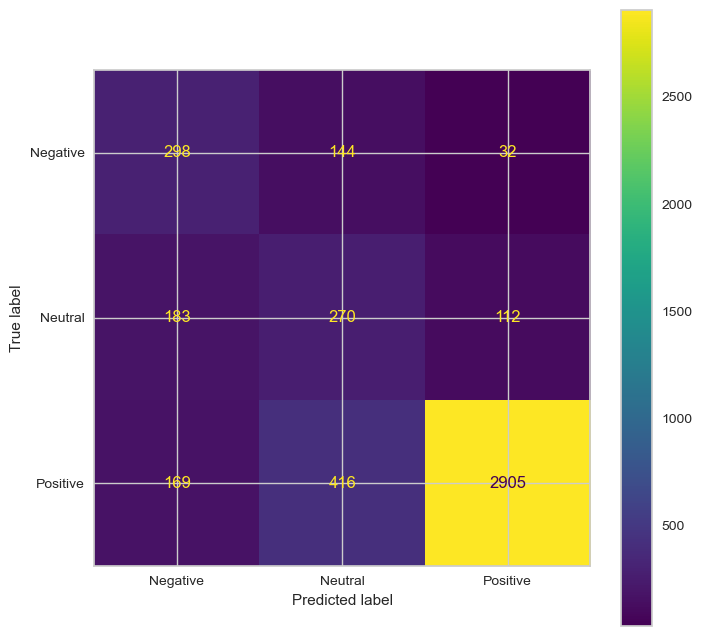

In [93]:
print("LOG MODEL")

eval(log, X_train_tf_idf, X_test_tf_idf)

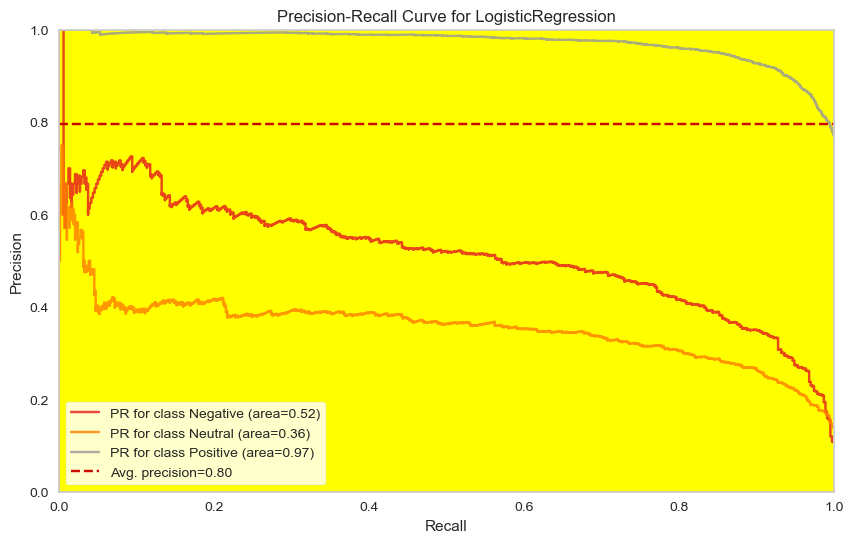

In [94]:
viz = PrecisionRecallCurve(
                            LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced"),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [95]:
log_AP_tfidf = viz.score_

9.2 Naive Bayes

9.2.a Naive Bayes With Count Vectorizor

In [96]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [97]:
nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

    Negative       0.55      0.49      0.52       474
     Neutral       0.39      0.45      0.42       565
    Positive       0.92      0.91      0.92      3490

    accuracy                           0.81      4529
   macro avg       0.62      0.62      0.62      4529
weighted avg       0.82      0.81      0.81      4529

Train_Set
              precision    recall  f1-score   support

    Negative       0.72      0.65      0.69      1896
     Neutral       0.53      0.63      0.58      2258
    Positive       0.94      0.92      0.93     13958

    accuracy                           0.86     18112
   macro avg       0.73      0.73      0.73     18112
weighted avg       0.86      0.86      0.86     18112



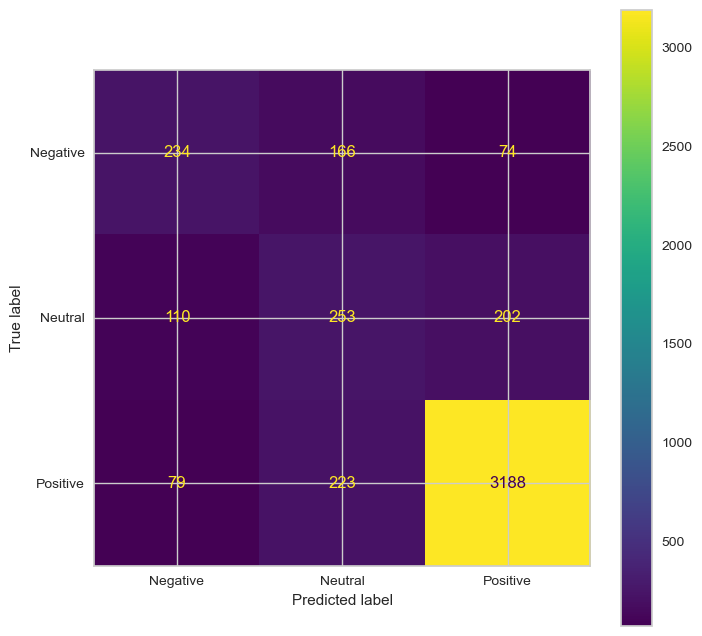

In [98]:
print("NB MODEL")

eval(nb, X_train_count, X_test_count)

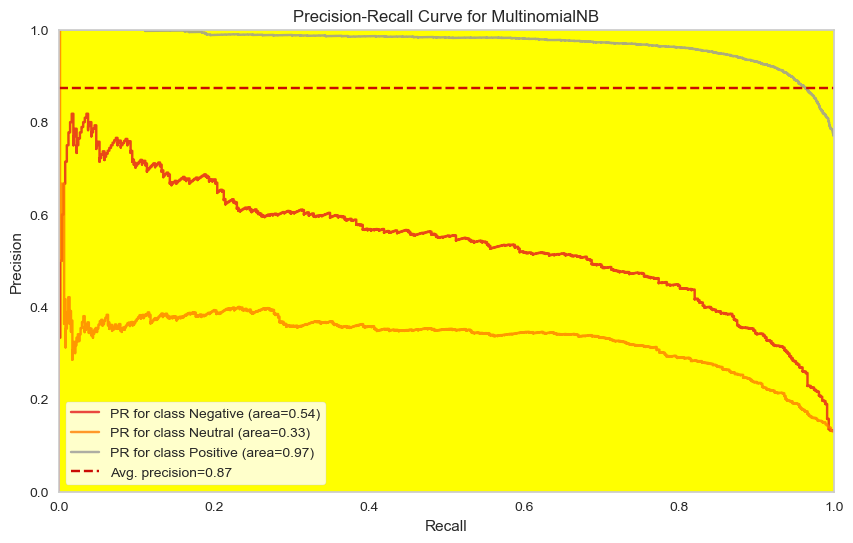

In [99]:
viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [100]:
nb_AP_count = viz.score_

9.2.b Naive Bayes With TF-IDF Vectorizer

In [101]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

    Negative       0.83      0.08      0.15       474
     Neutral       0.38      0.02      0.03       565
    Positive       0.78      1.00      0.88      3490

    accuracy                           0.78      4529
   macro avg       0.67      0.37      0.35      4529
weighted avg       0.74      0.78      0.70      4529

Train_Set
              precision    recall  f1-score   support

    Negative       0.92      0.13      0.23      1896
     Neutral       0.76      0.04      0.07      2258
    Positive       0.79      1.00      0.88     13958

    accuracy                           0.79     18112
   macro avg       0.82      0.39      0.40     18112
weighted avg       0.80      0.79      0.71     18112



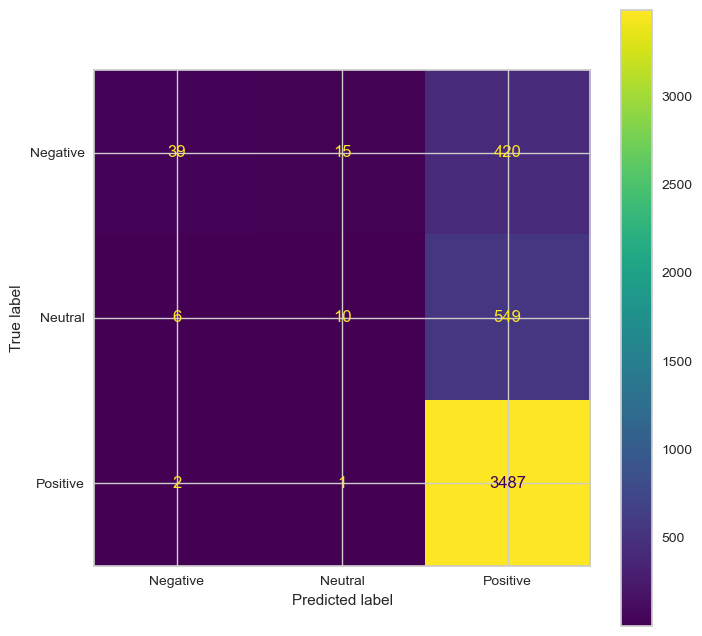

In [102]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

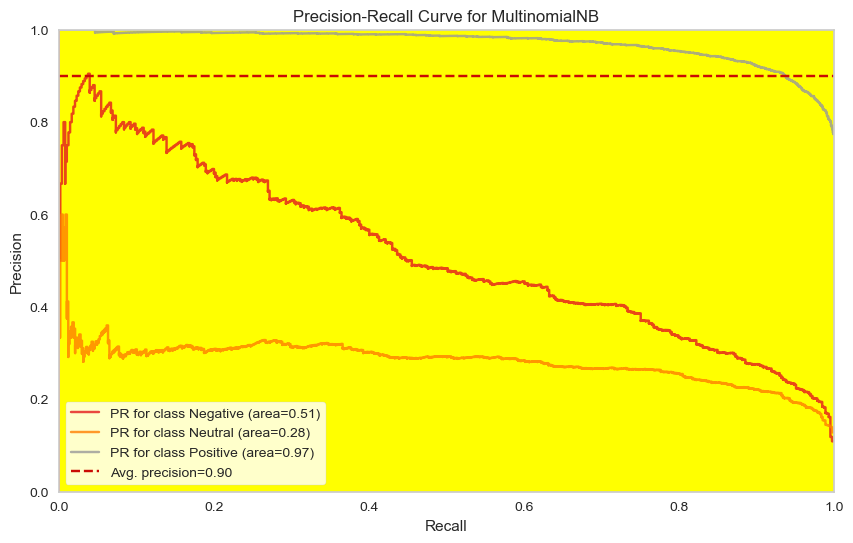

In [103]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [104]:
nb_AP_tfidf = viz.score_

9.3 Support Vector Machine (SVM)

9.3.a Support Vector Machine (SVM) With Count Vectorizor

In [105]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

    Negative       0.51      0.57      0.54       474
     Neutral       0.39      0.35      0.37       565
    Positive       0.92      0.92      0.92      3490

    accuracy                           0.81      4529
   macro avg       0.61      0.61      0.61      4529
weighted avg       0.81      0.81      0.81      4529

Train_Set
              precision    recall  f1-score   support

    Negative       0.69      0.77      0.73      1896
     Neutral       0.61      0.58      0.59      2258
    Positive       0.94      0.94      0.94     13958

    accuracy                           0.87     18112
   macro avg       0.75      0.76      0.75     18112
weighted avg       0.88      0.87      0.87     18112



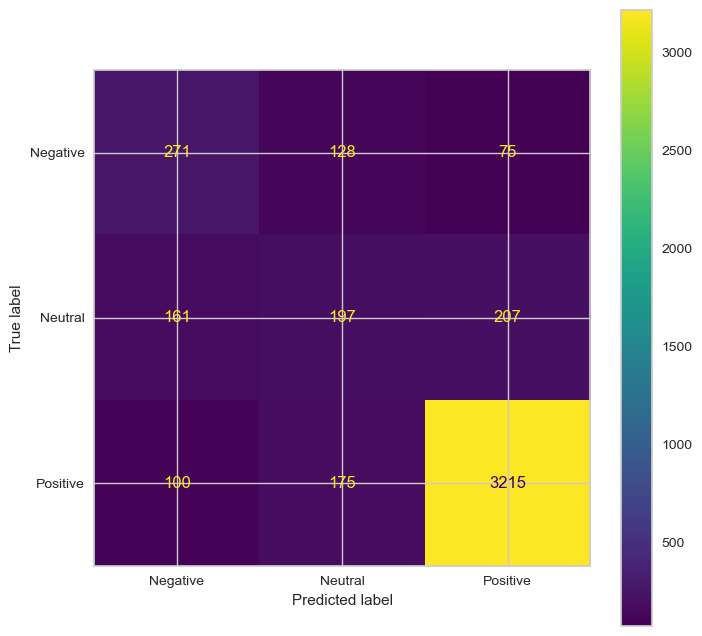

In [106]:
print("SVC MODEL")

eval(svc, X_train_count, X_test_count)

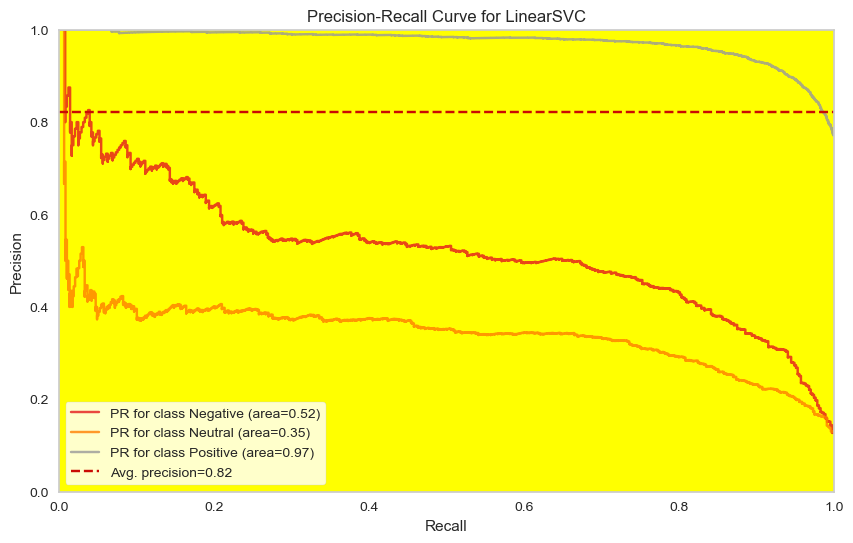

In [107]:
viz = PrecisionRecallCurve(
                            LinearSVC(C=0.01, class_weight="balanced", random_state=101),
                            classes=svc.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [108]:
svc_AP_count = viz.score_

9.3.b Support Vector Machine (SVM) With TF-IDF Vectorizer

In [109]:
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)

svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

    Negative       0.56      0.45      0.50       474
     Neutral       0.44      0.21      0.29       565
    Positive       0.87      0.96      0.91      3490

    accuracy                           0.82      4529
   macro avg       0.62      0.54      0.57      4529
weighted avg       0.78      0.82      0.79      4529

Train_Set
              precision    recall  f1-score   support

    Negative       0.66      0.53      0.59      1896
     Neutral       0.55      0.26      0.36      2258
    Positive       0.87      0.97      0.92     13958

    accuracy                           0.84     18112
   macro avg       0.70      0.59      0.62     18112
weighted avg       0.81      0.84      0.81     18112



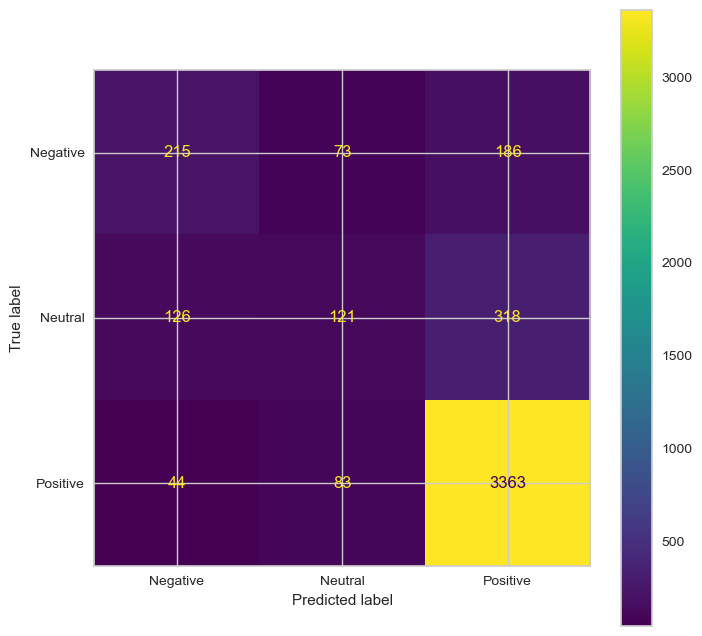

In [110]:
print("SVC MODEL")

eval(svc, X_train_tf_idf, X_test_tf_idf)

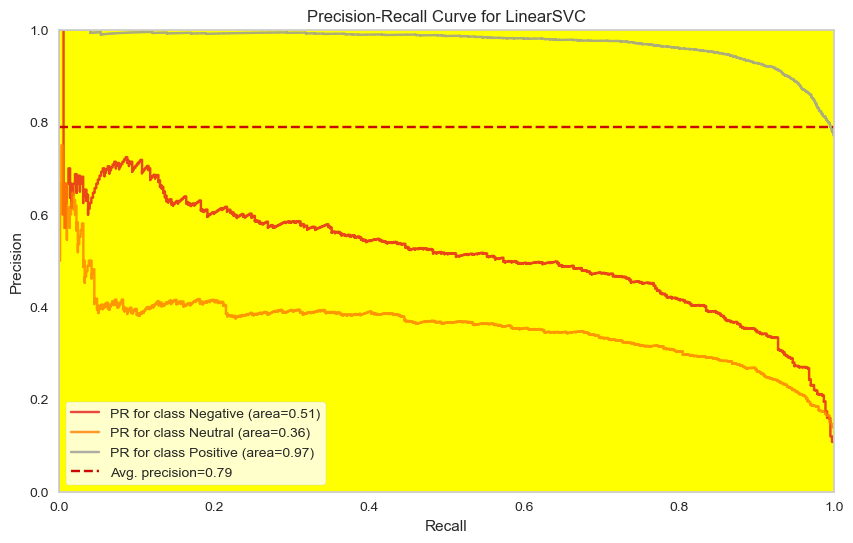

In [111]:
viz = PrecisionRecallCurve(
                            LinearSVC(C=0.01, class_weight="balanced", random_state=101),
                            classes=svc.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [112]:
svc_AP_tfidf = viz.score_

In [127]:
df.head()

,Review_Text,Sentiment
0,need easy comfortable top everyday wear bought...,Neutral
1,read previous review hoped color exaggerated h...,Positive
2,exactly expecting cute comfortable casual gold...,Positive
3,dress gorgeous love bought wear july wedding g...,Positive
4,love top made cotton vintage look flattering d...,Positive


# LSTM

In [ ]:
# functions:

# get all of strings from sentences
def get_all_str(sentences):
    sentence = ''
    for words in sentences:
        sentence += words
    sentence = sentence.lower()
    return sentence

# get string from list
def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence

# get word from text
def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
    return result

# remove stopwords from list
def remove_stopword(lst):    
    stoplist = stopwords.words('english')
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
#     print(stoplist)
    return cleanwordlist

# lemmatize
def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens

# get frequency dataframe which consists of frequency and term
def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

# function to plot word cloud of words
def Word_Cloud(data, color_background, colormap, title, mask):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=340,
               mask = mask,
               colormap= colormap,
               max_font_size=200,
               min_font_size = 1 ,
               random_state=8888, 
               background_color=color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

#   function to preprocess
def preprocess(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization(after_removing)
    frequency_df = Freq_df(lemmatize)
    return frequency_df

# preprocess -> get frequency dataframe -> plot Word Cloud
def create_wordcloud(column, title, color, mask):
    frequency_df = preprocess(column)
    data = frequency_df.set_index('Term').to_dict()['Frequency']
    Word_Cloud(data, 'white',color,title, mask)

In [ ]:
# preprocess: remove stopwords-> lemmatize
def preprocess(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization(after_removing)
    return lemmatize

df['Text'] = df['Text'].apply(preprocess)

In [ ]:
y= df['Recommended IND']
X = df.drop('Recommended IND',axis=1)

# split by ratio of 0.3
train_X, test_X, train_y, test_y = train_test_split(X['Text'], y, test_size=0.3, random_state = 8888)    

In [ ]:
# for tokenization
def fit_tokenizer(text, oov_token):
    tokenizer = Tokenizer(oov_token = oov_token)
    tokenizer.fit_on_texts(text)
    return tokenizer

# for sequence, padding
def seq_padding(sentences, tokenizer, padding, truncating, maxlen):
    sequences = tokenizer.texts_to_sequences(sentences)    
    pad_trunc_sequences = pad_sequences(sequences, padding = padding, maxlen = maxlen, truncating=padding)
    return pad_trunc_sequences

In [ ]:
tokenizer = fit_tokenizer(train_X, "<OOV>")

word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

train_X = seq_padding(train_X,tokenizer, 'post', 'post',max_len)
test_X = seq_padding(test_X,tokenizer, 'post', 'post', max_len) 

In [ ]:
GLOVE_FILE = '../input/glove6b100dtxt/glove.6B.100d.txt'
GLOVE_EMBEDDINGS = {}

with open(GLOVE_FILE) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        GLOVE_EMBEDDINGS[word] = coefs

In [ ]:
EMBEDDINGS_MATRIX = np.zeros((VOCAB_SIZE+1, 100))

num = 0
missed_list = []

for word, i in word_index.items():
    embedding_vector = GLOVE_EMBEDDINGS.get(word)
    if embedding_vector is not None:
        EMBEDDINGS_MATRIX[i] = embedding_vector
    else:
        num += 1
        missed_list.append(word)

print('How many missed words? ',num)
print('As example: ',missed_list[:10])

In [ ]:
# define model
def LSTM_model(vocab_size, embedding_dim, maxlen, embeddings_matrix):
    
    model = Sequential()
    
    model.add(Embedding(vocab_size+1,embedding_dim,input_length = maxlen, weights = [embeddings_matrix],trainable=False))
    model.add(Bidirectional(LSTM(64,kernel_regularizer=keras.regularizers.l2(0.001))))
    model.add(Dropout(0.3))
    
    tf.keras.layers.GlobalAveragePooling1D()

    model.add(Dense(6, activation = 'relu',kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  metrics = ['AUC']) 
    return model

In [ ]:
# fitting
model = LSTM_model(VOCAB_SIZE, 100, max_len, EMBEDDINGS_MATRIX)

history = model.fit(train_X, train_y, epochs = 60, batch_size = 128, validation_data=(test_X, test_y))

In [ ]:
# fitting
model = LSTM_model(VOCAB_SIZE, 100, max_len, EMBEDDINGS_MATRIX)

history = model.fit(train_X, train_y, epochs = 60, batch_size = 128, validation_data=(test_X, test_y))

In [ ]:
epoch = [x for x in range(1,61)]

color = ['#67001f','#b2182b','#4393c3','#2166ac']

fig1 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['auc'],line_color=color[0],name='1.auc score'),
    
    go.Line(x = epoch, y = history.history['val_auc'],line_color=color[3],name='2.val_auc score')
])

fig2 = go.Figure(data = [
    go.Line(x = epoch, y = history.history['loss'],line_color = color[1],name='3.loss'),
    
    go.Line(x = epoch, y = history.history['val_loss'], line_color = color[2],name='4.val_loss')
])

figures = [fig1,fig2]
title = ['AUC & val_AUC Score','Loss & Val_Loss Score']
fig = make_subplots(cols=len(figures),
                   subplot_titles=(title[0], title[1])) 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i+1)
        
fig.update_xaxes(title_text="epochs", row=1, col=1)
fig.update_xaxes(title_text="epochs", row=1, col=2)

fig.update_yaxes(title_text="AUC", row=1, col=1)
fig.update_yaxes(title_text="Loss", row=1, col=2)

fig.update_layout(template = "simple_white", title = 'AUC & LOSS',
                 font = dict(size=17, family = 'Franklin Gothic'))

In [ ]:
# test probability
test_predict_proba = model.predict(test_X, verbose=0)
# test predicted label
test_prediction_label = (model.predict(test_X) >= 0.5).astype("int32")  

accuracy = accuracy_score(test_y, test_prediction_label)
precision = precision_score(test_y, test_prediction_label)
recall = recall_score(test_y, test_prediction_label)
f1 = f1_score(test_y, test_prediction_label)
AUC = roc_auc_score(test_y, test_predict_proba)

# get list of test scores
test_score_list = [accuracy, precision, recall, f1, AUC]

In [ ]:
# test probability
train_predict_proba = model.predict(train_X, verbose=0)
# test predicted label
train_prediction_label = (model.predict(train_X) >= 0.5).astype("int32")  

accuracy = accuracy_score(train_y, train_prediction_label)
precision = precision_score(train_y, train_prediction_label)
recall = recall_score(train_y, train_prediction_label)
f1 = f1_score(train_y, train_prediction_label)
AUC = roc_auc_score(train_y, train_predict_proba)

# get list of train scores
train_score_list = [accuracy, precision, recall, f1, AUC]

In [ ]:
score_name = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
fig = go.Figure(data=[
    go.Bar(name='Train Scores', 
           x=score_name, y=train_score_list,
           text=np.round(train_score_list,3),marker_color='#67001f'),
    go.Bar(name='Test Scores', 
           x=score_name, y=test_score_list,
           text=np.round(test_score_list,3),marker_color='#fddbc7')
])
fig.update_layout(template = 'simple_white', title = 'Comparison of Train Scores & Test Scores')

fig.update_layout(
    xaxis_title="scoring metrix",
    yaxis_title="score",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()